In [ ]:
"""
Ho va Ten: Bui Thi Thanh Xuan
MSSV: 19110522
"""

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/ML-2022/Lab02/House_Price_2.csv")
df.head()

,width,length,price
0,28,97,3.350184e+08
1,21,62,2.298295e+08
2,27,64,2.603552e+08
3,5,92,2.064708e+08
4,13,84,2.339808e+08


In [ ]:
## trích chiều rộng thành một mảng numpy
Width = df['width'].values        
Width = Width.reshape(-1, 1)        ## chuyển thành ma trận cột
print(Width.shape)

## Trích chiều dài 
Length = df['length'].values  
Length = Length.reshape(-1,1)
print(Length.shape)


## Trích giá tiền
price = df['price'].values
price = price.reshape(-1,1)
print(price.shape)


(100, 1)
(100, 1)
(100, 1)


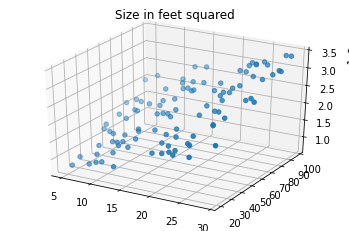

In [ ]:
## vẽ hình
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(Width,Length,price)
ax.set_title('Size in feet squared')
plt.show()

In [ ]:
#Nối 2 cột chiều rộng (Width) và chiều dài (Length) lại và gán vào X
X = np.concatenate([Width,Length], axis=-1) 
## thêm một cột vào sau X và gán vào Z
Z = np.concatenate([X, np.ones((100,1))], axis=-1)

# Gradient Descent giải Linear Regression:

In [ ]:
def Gradient_descent(Z,y):
    
    '''
        Hàm giải bài toán linear regression bằng gradient descent
        ---------------------------
        Tham số:
            Z: là ma trận (100,3) chứa các features của bài toán + một cột bằng 1
            y: label của bài toán (price)
        ---------------------------
        Trả về:
            GD_theta: một vector chứa các tham số mô hình cần tối ưu (hệ số hồi quy)
    '''

    GD_theta = np.asarray([[1.0], [1.0],[100]])     ## khởi tạo theta

    n_iter = 1000000           ## số vòng lặp cập nhật theta
    lmda = 0.0001          ## learning rate
    for i in range(n_iter):
        error = y - np.matmul(Z, GD_theta)
        GD_theta =  GD_theta - 2/Z.shape[0]*lmda*np.matmul(-Z.T, error)   ##cập nhật theta
        if i % 100000 == 0:
            loss = np.mean(np.square(y - np.matmul(Z, GD_theta)))
            print("Loss at iter {}: {}".format(i, loss))
    loss = np.mean(np.square(y - np.matmul(Z,GD_theta)))
    print("Final loss: ", loss)
    print("Final theta: ", GD_theta)
    return GD_theta

In [ ]:
GD_theta = Gradient_descent(Z,price)

Loss at iter 0: 1932732010729863.0
Loss at iter 100000: 8630577269238.074
Loss at iter 200000: 8629350455086.722
Loss at iter 300000: 8629316516196.379
Loss at iter 400000: 8629315577302.515
Loss at iter 500000: 8629315551328.722
Loss at iter 600000: 8629315550610.169
Loss at iter 700000: 8629315550590.312
Loss at iter 800000: 8629315550589.746
Loss at iter 900000: 8629315550589.747
Final loss:  8629315550589.746
Final theta:  [[4992438.83511508]
 [1997577.09732904]
 [ 844994.81432387]]


**Exact** **solution**

In [ ]:
## exact solution
Z = Z.astype(np.float64)       

## giá trị a, b và c tìm được
exact_theta = np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T,Z)), Z.T), price)
print(exact_theta)
print(exact_theta.shape)

[[4992438.83485118]
 [1997577.09722778]
 [ 844994.82587483]]
(3, 1)


**Sklearn**

In [ ]:
## SkLearn
regression = LinearRegression()
regression.fit(X, price) ## train LinearRegression 
a,c = regression.coef_,regression.intercept_  
sk_theta = np.array([[a[0][0]],[a[0][1]],[c[0]]]) ## lấy các tham số học được
print(sk_theta)
sk_theta.shape

[[4992438.83485116]
 [1997577.09722778]
 [ 844994.82587495]]


(3, 1)

# So sánh kết quả (MSE) với Exact Solution và kết quả từ Sklearn

In [ ]:
print("GD MSE: ", np.mean(np.square(price - Z.dot(GD_theta))))
print("Exact SOl MSE: ", np.mean(np.square(price - Z.dot(exact_theta))))
print("SK MSE: ", np.mean(np.square(price - Z.dot(sk_theta))))

GD MSE:  8629315550589.746
Exact SOl MSE:  8629315550589.733
SK MSE:  8629315550589.731


***Nhận xét:***  
MSE của 2 phương pháp Gradient descent, Exact solution và sklean là tương đối giống nhau.